In [29]:
import tensorflow 

In [30]:
from tensorflow.keras.datasets import cifar10
data  = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = data

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [32]:
x_test[4]

array([[[ 65,  68,  50],
        [ 70,  81,  64],
        [ 48,  64,  46],
        ...,
        [ 51,  67,  41],
        [ 54,  76,  53],
        [ 67,  87,  66]],

       [[ 69,  80,  58],
        [ 79, 102,  81],
        [ 60,  74,  57],
        ...,
        [ 54,  66,  44],
        [ 65,  90,  69],
        [ 61,  81,  66]],

       [[ 73,  95,  72],
        [ 84, 109,  87],
        [ 72,  88,  70],
        ...,
        [ 78,  98,  75],
        [ 73,  98,  77],
        [ 48,  59,  51]],

       ...,

       [[ 95, 127,  92],
        [ 91, 123,  86],
        [ 57,  79,  45],
        ...,
        [144, 172, 108],
        [170, 201, 134],
        [122, 143,  98]],

       [[ 94, 125,  82],
        [ 75, 104,  71],
        [ 32,  52,  24],
        ...,
        [143, 181, 116],
        [154, 188, 123],
        [106, 129,  89]],

       [[ 78, 102,  65],
        [ 35,  51,  27],
        [ 24,  40,  17],
        ...,
        [143, 179, 136],
        [154, 185, 146],
        [128, 156, 117]]

In [33]:
class_name = ['airplane', 'automobile', 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

def get_name(n):
    return class_name[int(n)]

ship


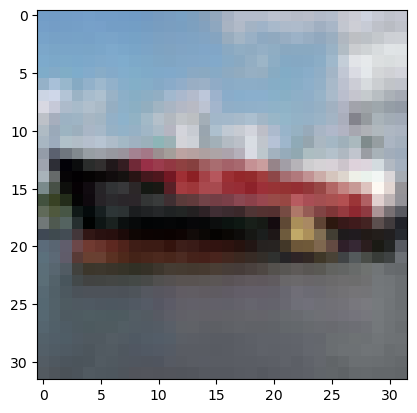

In [34]:
import matplotlib.pyplot as plt 
N=2220
plt.imshow(x_train[N])
print(get_name(y_train[N]))

In [35]:
x_train = x_train/255
x_test  = x_test/255

In [55]:
x_test.shape

(10000, 32, 32, 3)

In [79]:
from tensorflow.keras.models import Sequential 

model = Sequential()

In [80]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model.add(Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=(1,1), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(Dense(0.3))

model.add(Flatten())

# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Flatten

# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1), input_shape=(32, 32,3)))
# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
# model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', strides=(1,1)))
# model.add(MaxPooling2D(padding='valid', pool_size=2, strides=2))

# model.add(Dropout(0.3))

# model.add(Flatten())


In [81]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [82]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

In [83]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [84]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history  = model.fit(x_train, y_train, epochs=50, batch_size=50, verbose=1, validation_data=(x_test, y_test),callbacks=(callbacks) )

Epoch 1/50


2024-01-04 11:09:04.071809: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: logits and labels must have the same first dimension, got logits shape [3200,10] and labels shape [50]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/traitlets/config/application.py", line 1077, in launch_instance
      app.start()
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start
      self.io_loop.start()
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell
      await result
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/gw/59d_3_md4pz0_dn5bhy5b8cc0000gn/T/ipykernel_81146/2882947598.py", line 3, in <module>
      history  = model.fit(x_train, y_train, epochs=50, batch_size=50, verbose=1, validation_data=(x_test, y_test),callbacks=(callbacks) )
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/keras/backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [3200,10] and labels shape [50]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_27792]